In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import warnings
warnings.filterwarnings('ignore')

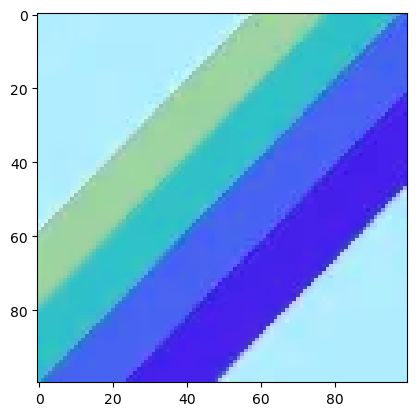

In [2]:
image = cv2.imread('/Users/sujeetmohanty/Downloads/colors.jpg')

plt.imshow(image);

In [3]:
image.shape

(100, 100, 3)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = 0,with_std=1)

In [5]:
r = []
g = []
b = []

for line in image:
    for pixel in line:
        temp_b , temp_g,temp_r = pixel
        
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
    
df = pd.DataFrame({'red': r,'green': g,'blue': b})

df['scaled_red'] = scaler.fit_transform(df[['red']])
df['scaled_green'] = scaler.fit_transform(df[['green']])
df['scaled_blue'] = scaler.fit_transform(df[['blue']])

df.head()

,red,green,blue,scaled_red,scaled_green,scaled_blue
0,255,239,174,8.149127,3.175614,3.207948
1,255,239,174,8.149127,3.175614,3.207948
2,255,239,174,8.149127,3.175614,3.207948
3,255,239,174,8.149127,3.175614,3.207948
4,255,238,176,8.149127,3.162326,3.244821


In [6]:
X = df[['scaled_red','scaled_green','scaled_blue']].values
X

array([[8.14912721, 3.17561351, 3.20794817],
       [8.14912721, 3.17561351, 3.20794817],
       [8.14912721, 3.17561351, 3.20794817],
       ...,
       [8.11716985, 3.14903934, 3.22638465],
       [8.11716985, 3.14903934, 3.22638465],
       [8.11716985, 3.14903934, 3.22638465]])

In [7]:
SSE = []

for cluster in range(2,8): 
    kmeans = KMeans(n_clusters=cluster,random_state=42)
    kmeans.fit(X)
    
    pred_clusters = kmeans.predict(X)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(2,8) , 'SSE':SSE})
print(frame)

   Cluster           SSE
0        2  14484.979951
1        3   5444.690337
2        4   1710.333538
3        5    969.860477
4        6    772.086493
5        7    654.109843


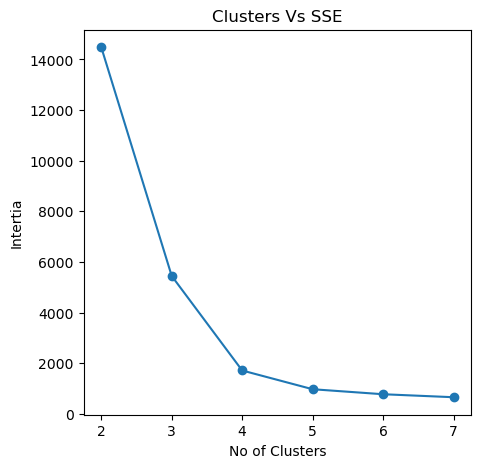

In [8]:
plt.figure(figsize=(5,5))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.title('Clusters Vs SSE')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')
plt.show()

In [9]:
#Fit and predict for k = 4
k=5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
k_pred = kmeans.predict(X)

#These are the centroids of the clusters
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[7.42755121, 0.46409192, 1.23682047],
       [8.0981063 , 3.14556071, 3.26144536],
       [6.39981587, 2.50101209, 0.94760701],
       [5.29261003, 2.7960411 , 2.80023665],
       [7.69571127, 1.34846395, 1.30566829]])

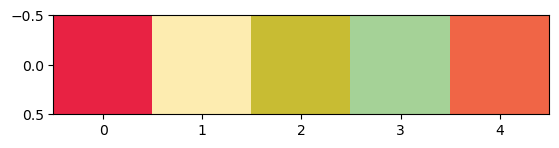

In [10]:
colors = []

r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    
    colors.append((
    scaled_r * r_std /255,
    scaled_g * g_std / 255,
    scaled_b * b_std/ 255
    ))
    
plt.imshow([colors])
plt.show()

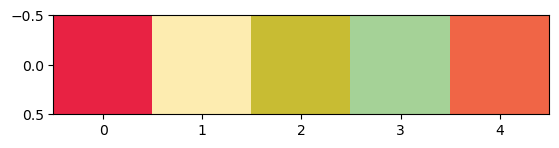

In [11]:
plt.imshow([colors])
plt.savefig('output.jpg')